In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import csv 
%matplotlib inline

In [3]:
path="data/"
loading = pd.read_csv(path + 'velibLoading.csv', sep=" ")
coord = pd.read_csv(path + 'velibCoord.csv', sep=" ")

In [4]:
loading.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [5]:
coord.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

Do these df contain missing data?

In [6]:
print('--Loading--')
print(loading.isnull().sum().sum())
print('--Coord--')
print(coord.isnull().sum())

--Loading--
0
--Coord--
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


In [7]:
print('--Loading--')
print(loading.duplicated().sum())
# nous n'avons pas de données dupliquées dans les colonnes de loading 
print('--Coord--')
print(coord.duplicated().sum())
#pareil pour coord

--Loading--
0
--Coord--
0


In [9]:
station_names = coord.names.value_counts()
print(station_names)

name = station_names.index[0]
print(coord[coord.names==name])

names
 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: count, Length: 1161, dtype: int64
     longitude   latitude  bonus             names
362   2.404770  48.876604      1   PORTE DES LILAS
450   2.405960  48.875412      1   PORTE DES LILAS
957   2.411046  48.878099      1   PORTE DES LILAS


<Axes: >

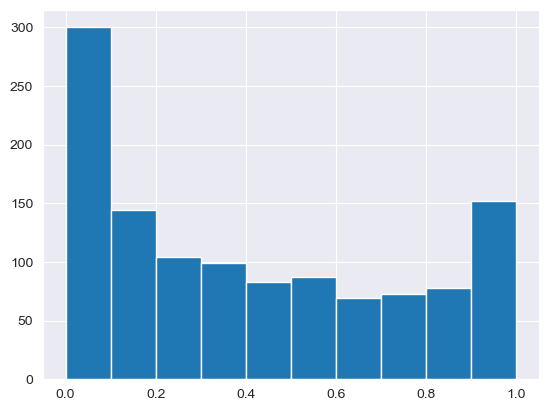

In [10]:
loading["Lun-02"].hist()

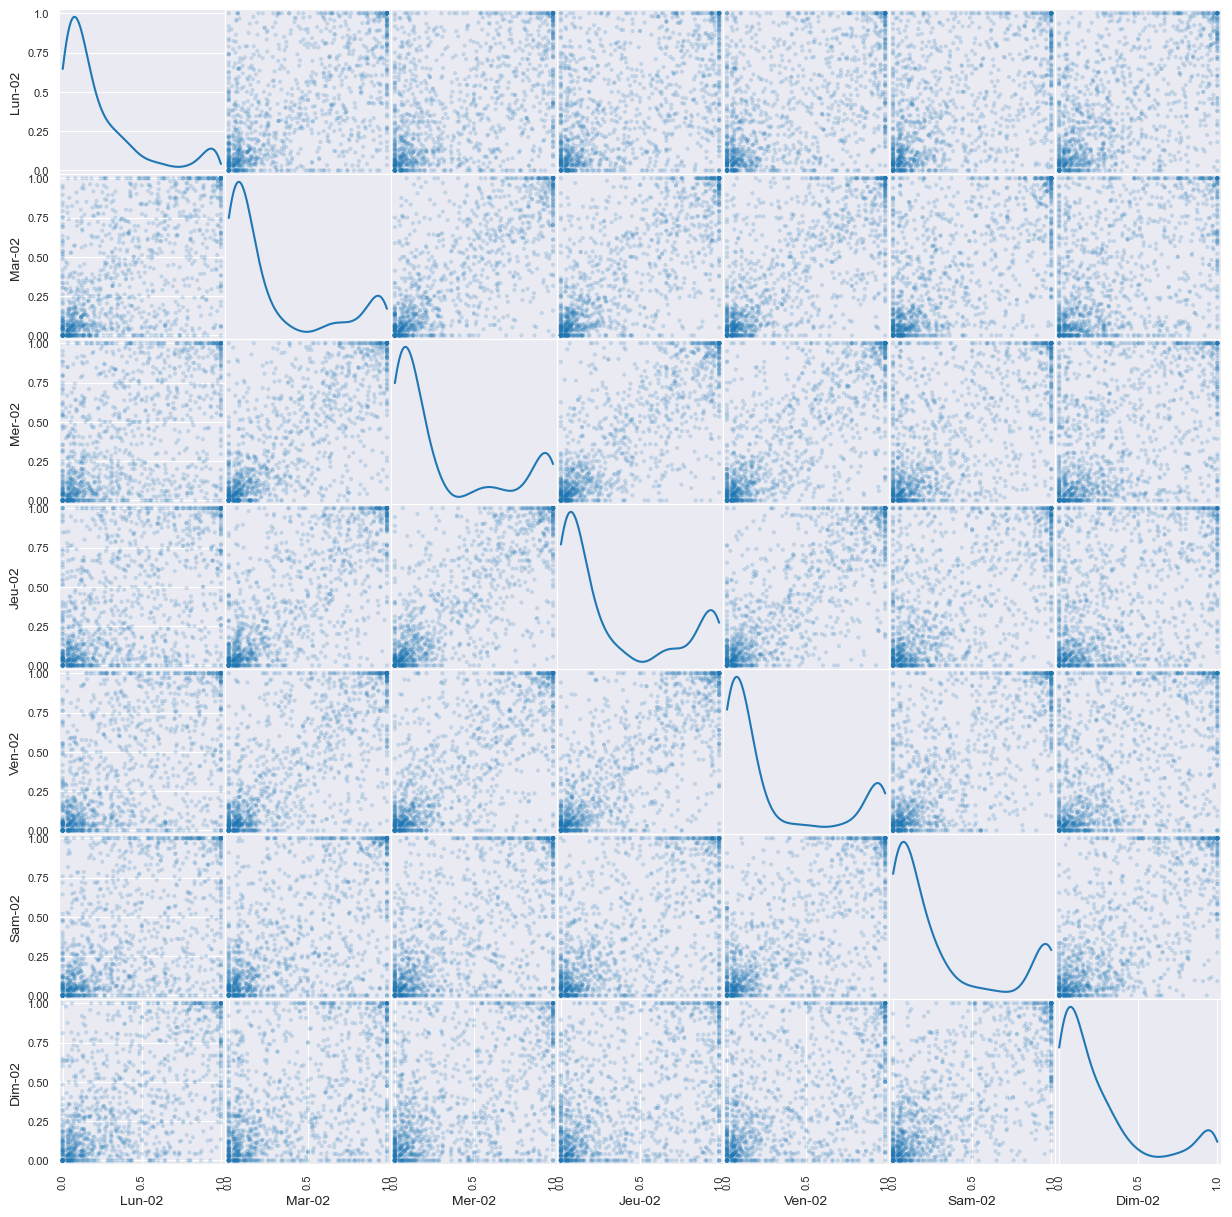

In [11]:
from pandas.plotting import scatter_matrix
heure="02"
scatter_matrix(loading[["Lun-"+heure,
                        "Mar-"+heure,
                        "Mer-"+heure,
                        "Jeu-"+heure,
                        "Ven-"+heure,
                        "Sam-"+heure,
                        "Dim-"+heure]], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

On observe une certaine corrélation entre les différents jours de la semaine : les points sont relativement ordonnés d'un jour de la semaine à un autre, et il en va de même pour les jours de week-end. En revanche, on remarque que le chargement dans les stations sur jours de la semaine et sur ceux du week-end semblent avoir des profils très différents.

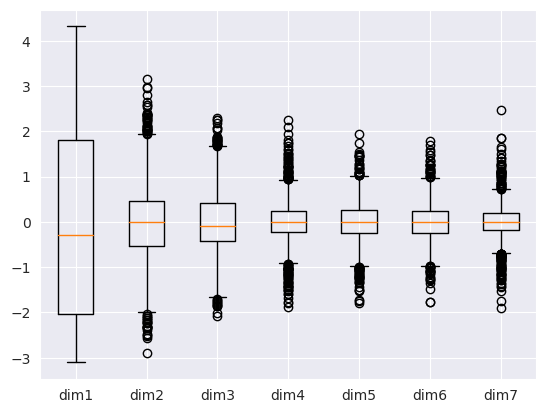

In [129]:
dim="dim"
tags = ["dim1","dim2","dim3","dim4","dim5","dim6","dim7"]
plt.boxplot(C[:,0:7], labels=tags)
plt.show()

On observe bien la première dimension explique a peu près 70% de la variance empirique, et que l'on peut s'arrêter à la dimension 3.

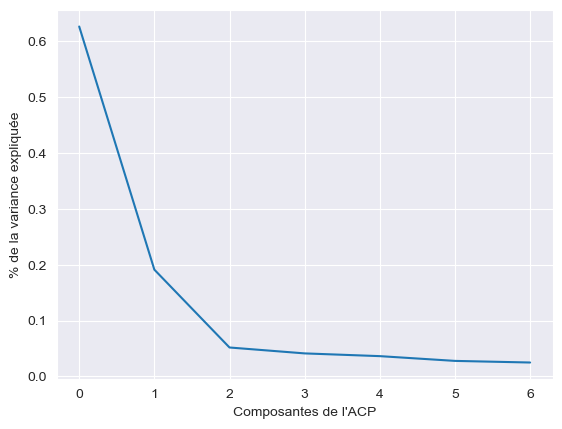

On garde les 3 premières composantes de l'ACP, afin d'expliquer 85.0 % de la variance empirique.


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
#X=scale(ozone[["O3obs","MOCAGE","TEMPE","VentMOD","VentANG","SRMH2O","LNO2","LNO"]])
heure="12"
X=scale(loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Composantes de l'ACP")
plt.ylabel("% de la variance expliquée")
plt.show()


ratio_voulu = 0.85
index = 0
cumul = 0

while cumul<ratio_voulu:
    cumul += pca.explained_variance_ratio_[index]
    index += 1
    
print("On garde les" ,index, "premières composantes de l'ACP, afin d'expliquer", ratio_voulu*100 ,"% de la variance empirique.")

Faisons de même avec toutes les heures de la journée à la fois.

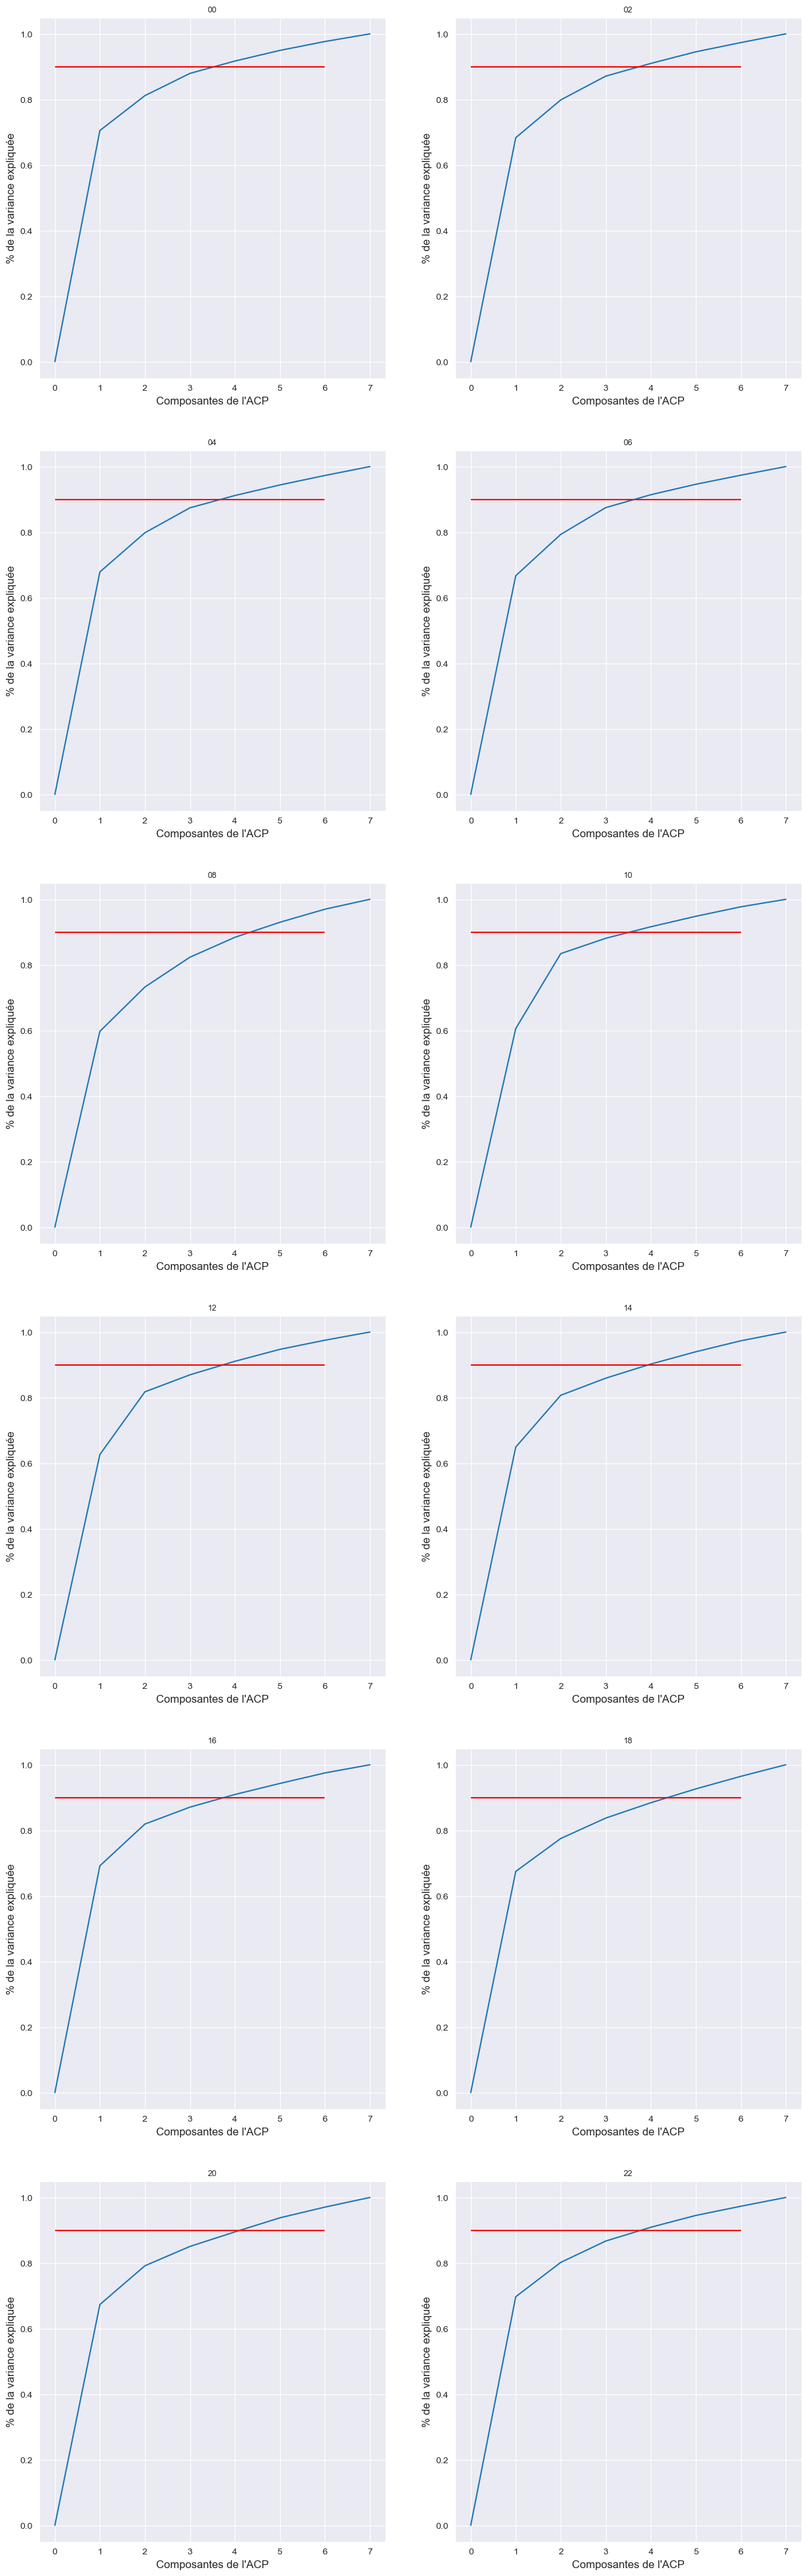

In [77]:
heures=["00","02","04","06","08","10","12","14","16","18","20","22"]
nlig=6
ncol=2


fig, axs= plt.subplots(nlig,ncol, figsize=(15,50))
for i in range(nlig):
    for j in range(ncol):
        cumul_variance_ratio=[0]
        heure=heures[i*ncol+j]
        X=scale(loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]])
        pca = PCA()
        C = pca.fit(X).transform(X)
        for k in range(len(pca.explained_variance_ratio_)):
            if k == 0 :
                cumul_variance_ratio.append(pca.explained_variance_ratio_[k])
            else:
                cumul_variance_ratio.append(pca.explained_variance_ratio_[k]+cumul_variance_ratio[k])
        axs[i,j].plot(cumul_variance_ratio)
        axs[i,j].hlines(ratio_voulu, 0, 6, color='red')
        plt.xlabel("Composantes de l'ACP")
        plt.ylabel("% de la variance expliquée")
        axs[i,j].set_title(heure, fontsize = 9)
        
for ax in axs.flat:
    ax.set_xlabel("Composantes de l'ACP", fontsize = 12)
    ax.set_ylabel('% de la variance expliquée', fontsize = 12)

plt.show()

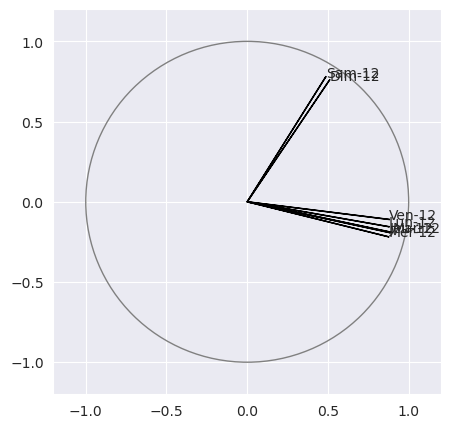

In [136]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim2)

En choisissant 12h, on voit que l'axe 1 est beaucoup plus corrélé aux variables de la semaine, tandis que l'axe 2 est plus corrélé aux variables du week-end. 

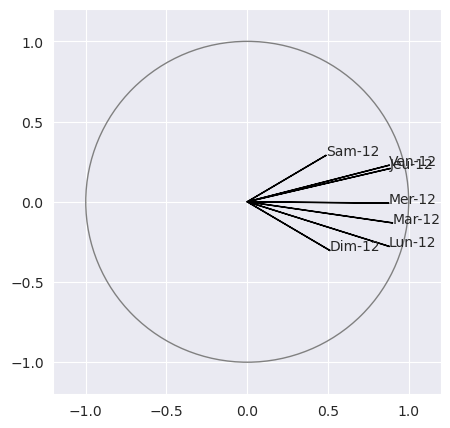

In [137]:
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord3, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim3)

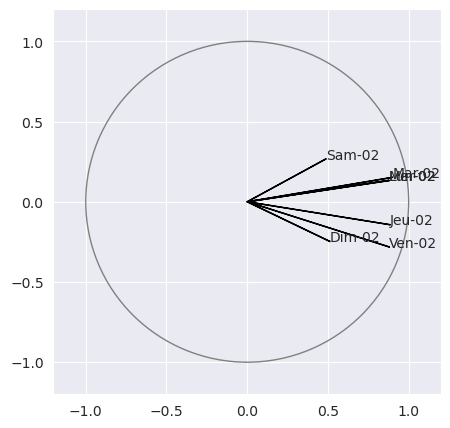

In [138]:
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
heure="02"
for i, j, nom in zip(coord1,coord4, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim4)

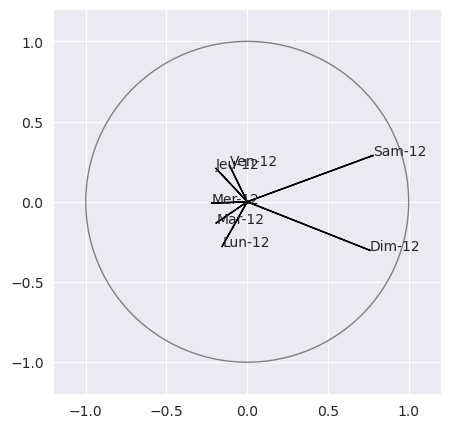

In [139]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
heure="12"
for i, j, nom in zip(coord2,coord3, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim2,dim3)

On remarque que les jours de la semaine sont mal projetés dans ce plan, donc mal expliqués par ce couple de dimensions. Les jours du week-end sont, eux, corrélés négativement par rapport à la troisième composante.

In [99]:
print(pca.components_)

[[ 0.41874533  0.428665    0.41756112  0.4215991   0.41919666  0.23197272
   0.24343048]
 [-0.13416785 -0.16520771 -0.18847982 -0.16628765 -0.09509603  0.67243689
   0.65598365]
 [-0.46026381 -0.21776189 -0.01408084  0.34352822  0.37752412  0.47815773
  -0.50136593]
 [ 0.24528327  0.28254945  0.24834404 -0.26537474 -0.52252332  0.49516079
  -0.45791766]
 [-0.49109425 -0.09488805  0.68939628  0.23980889 -0.39109561 -0.13375541
   0.2149439 ]
 [-0.00862472 -0.22831068  0.48343265 -0.69678868  0.47738469 -0.00168282
  -0.02606303]
 [-0.54166108  0.77496373 -0.13881887 -0.25128562  0.13720027 -0.0480096
   0.04990499]]


On voit bien que samedi et dimanche sont très corrélés 

### Clustering par Kmeans

(a comprendre plus tard)

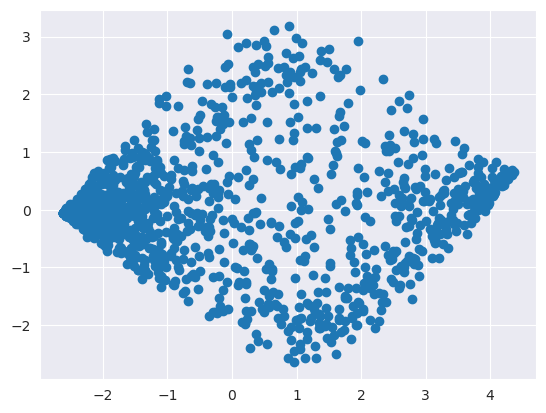

In [171]:
plt.scatter(C[:,0], C[:,1])

In [163]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=2, n_init='auto')
clust.fit(X)
classe=clust.labels_
print(classe)

[0 0 1 ... 0 1 1]


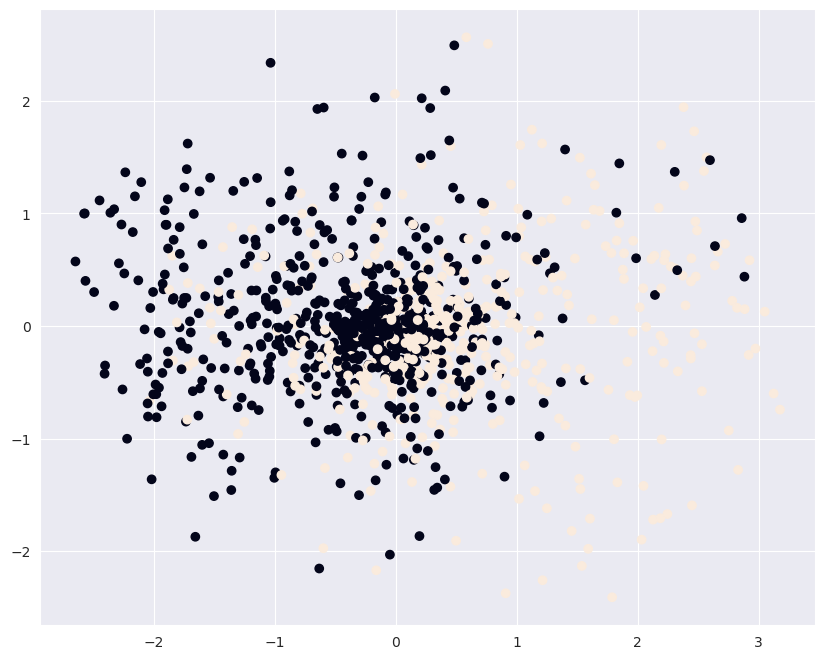

In [173]:
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

### Etude de l'heure

Peut-on expliquer le chargement des stations en fonction de l'heure?

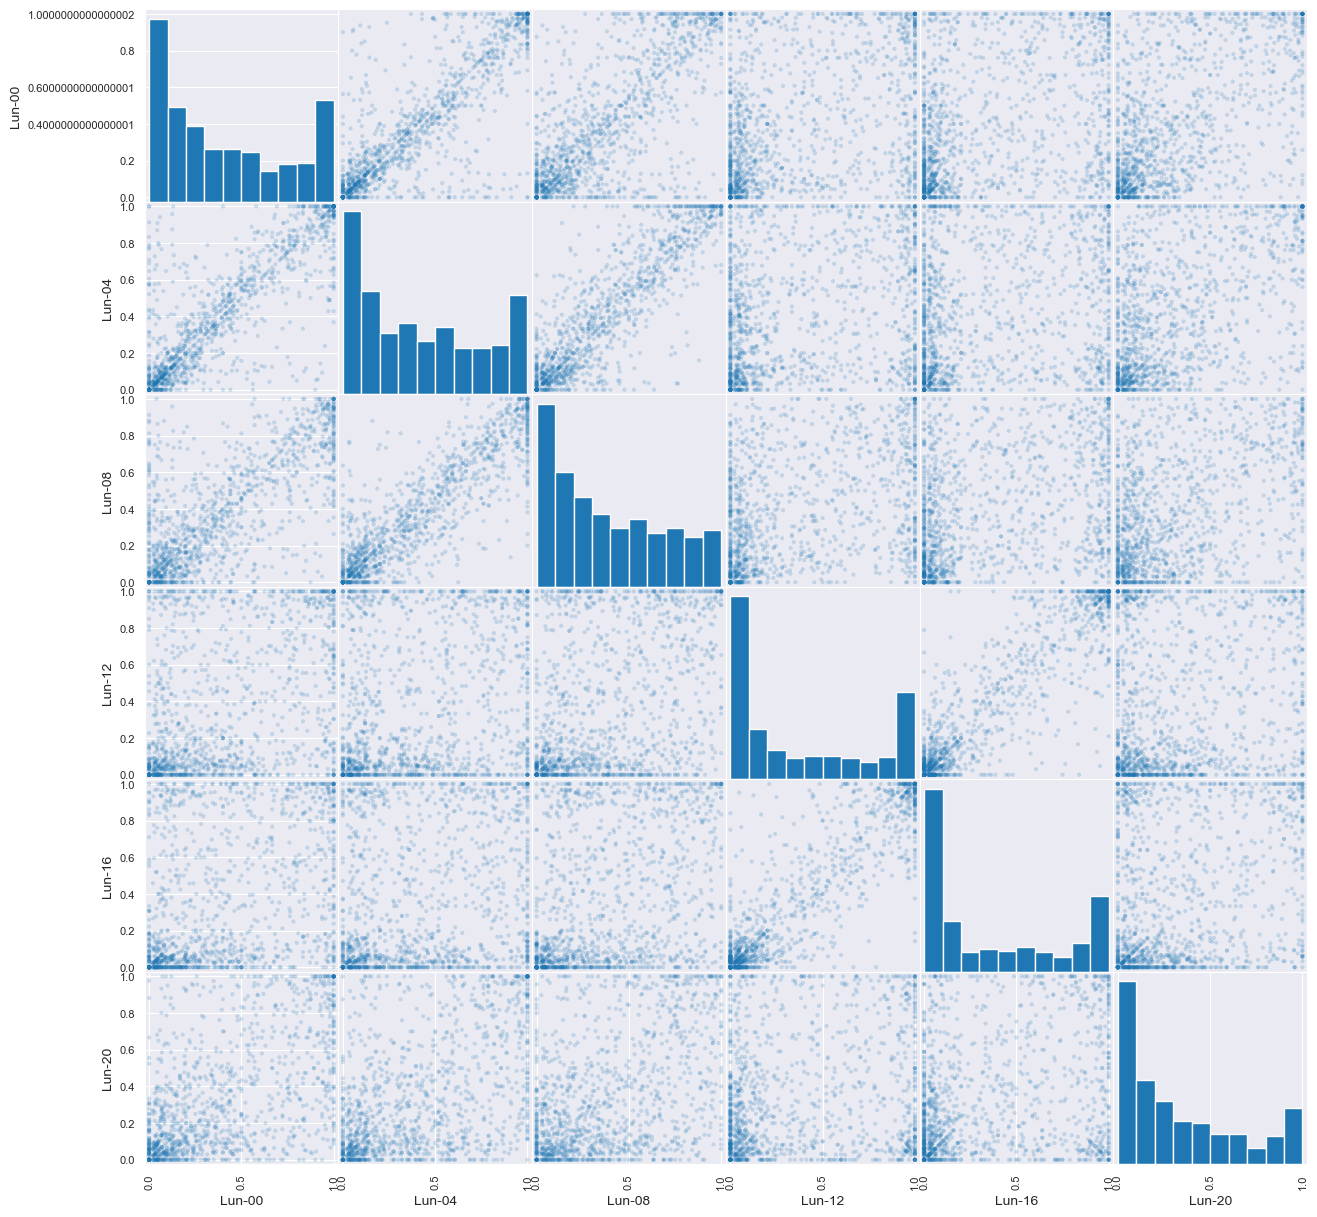

In [22]:
from pandas.plotting import scatter_matrix
jour="Lun-"
scatter_matrix(loading[[jour+"00",
                        jour+"04",
                        jour+"08",
                        jour+"12",
                        jour+"16",
                        jour+"20"]], alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

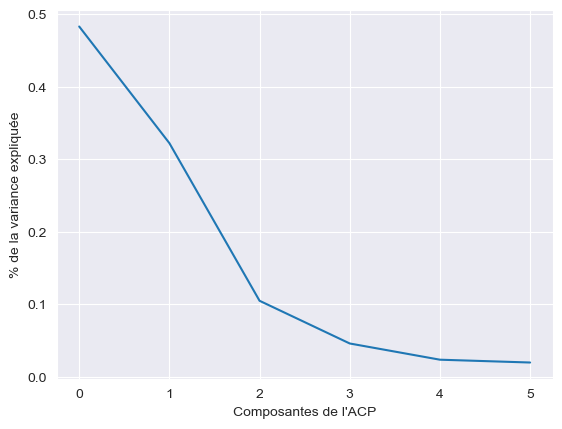

On garde les 3 premières composantes de l'ACP, afin d'expliquer 90.0 % de la variance empirique.


In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
jour="Mar-"
X=scale(loading[[jour+"00",
                 jour+"04",
                 jour+"08",
                 jour+"12",
                 jour+"16",
                 jour+"20"]])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Composantes de l'ACP")
plt.ylabel("% de la variance expliquée")
plt.show()


ratio_voulu = 0.90
index = 0
cumul = 0

while cumul<ratio_voulu:
    cumul += pca.explained_variance_ratio_[index]
    index += 1

print("On garde les" ,index, "premières composantes de l'ACP, afin d'expliquer", ratio_voulu*100 ,"% de la variance empirique.")

Faisons de même avec tous les jours de la semaine à la fois.

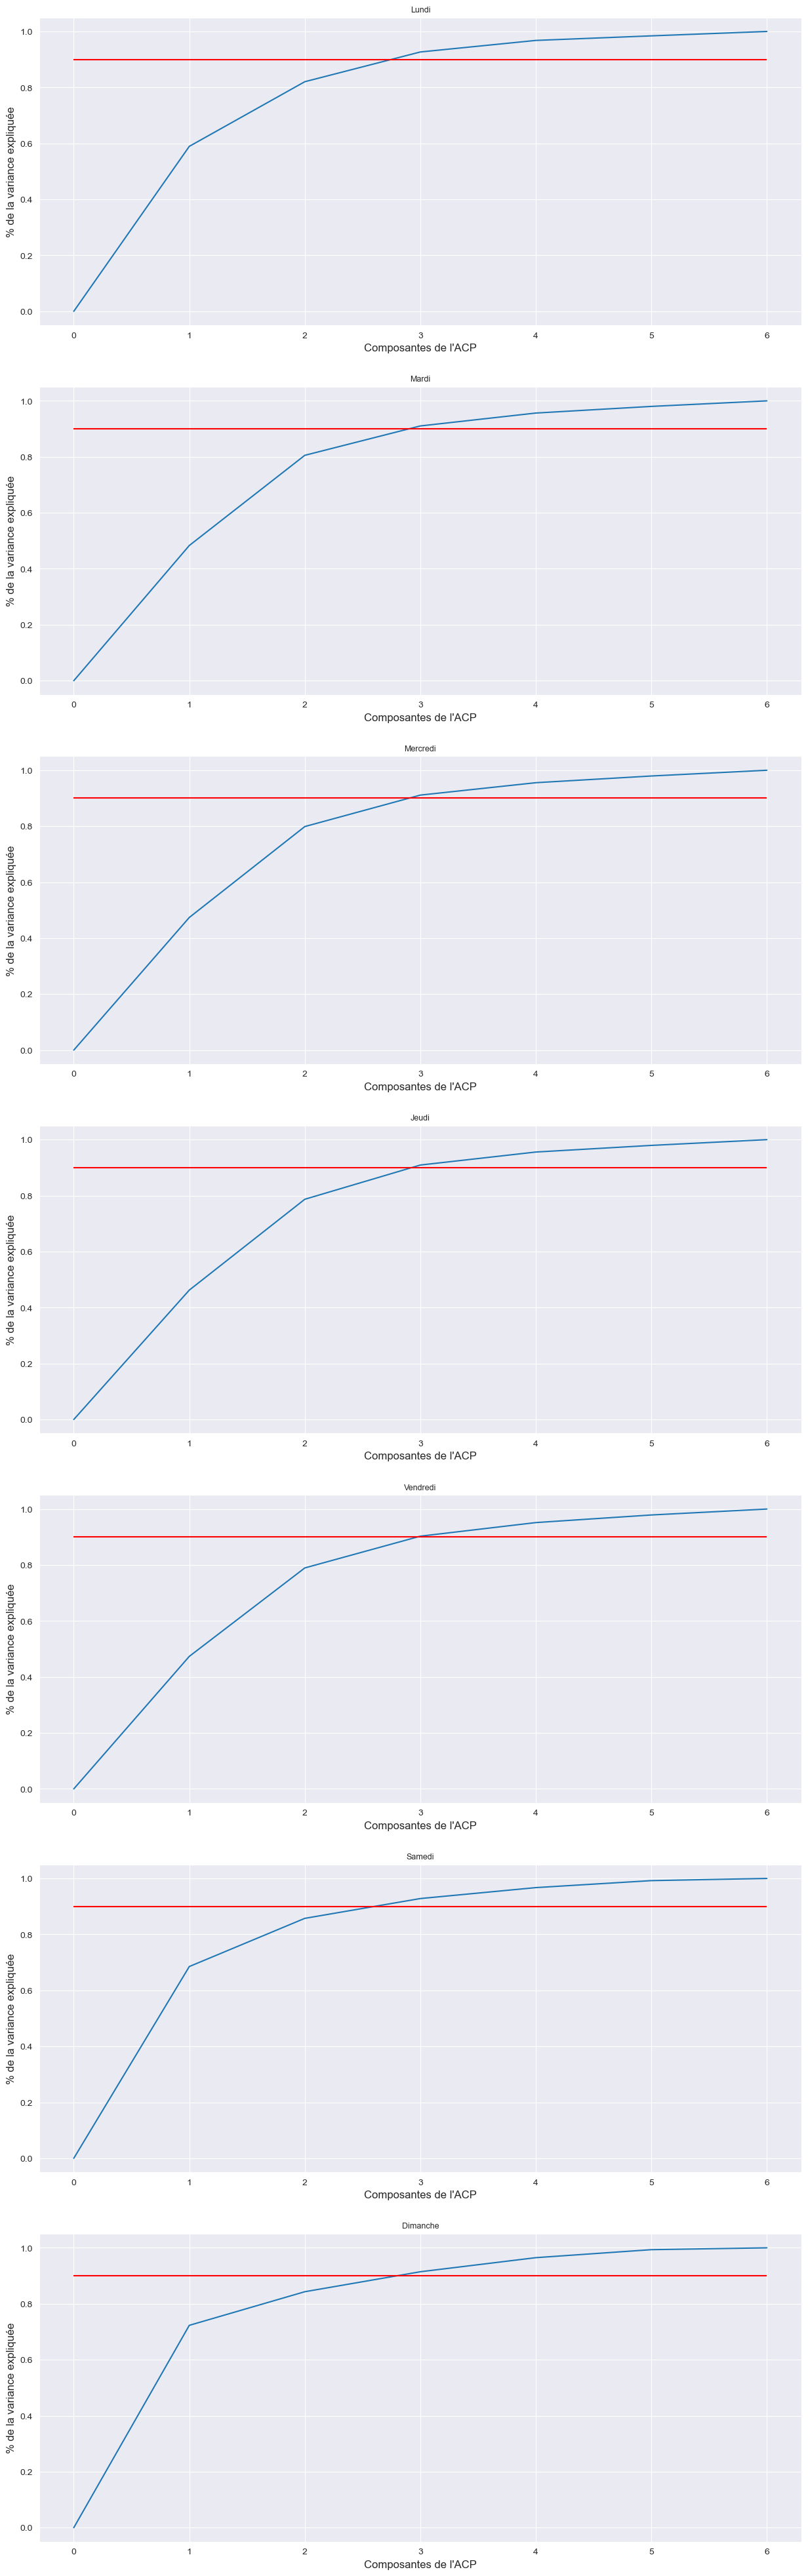

In [66]:
jours=["Lun-","Mar-","Mer-","Jeu-","Ven-","Sam-","Dim-"]
titles=["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

fig, axs= plt.subplots(7,1, figsize=(15,50))
for i in range(len(jours)):
        cumul_variance_ratio=[0]
        jour=jours[i]
        X=scale(loading[[jour+"00",
                 jour+"04",
                 jour+"08",
                 jour+"12",
                 jour+"16",
                 jour+"20"]])
        pca = PCA()
        C = pca.fit(X).transform(X)
        for j in range(len(pca.explained_variance_ratio_)):
            if j == 0 :
                cumul_variance_ratio.append(pca.explained_variance_ratio_[j])
            else:
                cumul_variance_ratio.append(pca.explained_variance_ratio_[j]+cumul_variance_ratio[j])
        axs[i].plot(cumul_variance_ratio)
        axs[i].hlines(ratio_voulu, 0, 6, color='red')
        plt.xlabel("Composantes de l'ACP")
        plt.ylabel("% de la variance expliquée")
        axs[i].set_title(titles[i], fontsize = 9)
        
for ax in axs.flat:
    ax.set_xlabel("Composantes de l'ACP", fontsize = 12)
    ax.set_ylabel('% de la variance expliquée', fontsize = 12)

plt.show()

3 Composantes de l'ACP nous permettent d'expliquer plus de 90% de la variance pour tous les jours de la semaine.

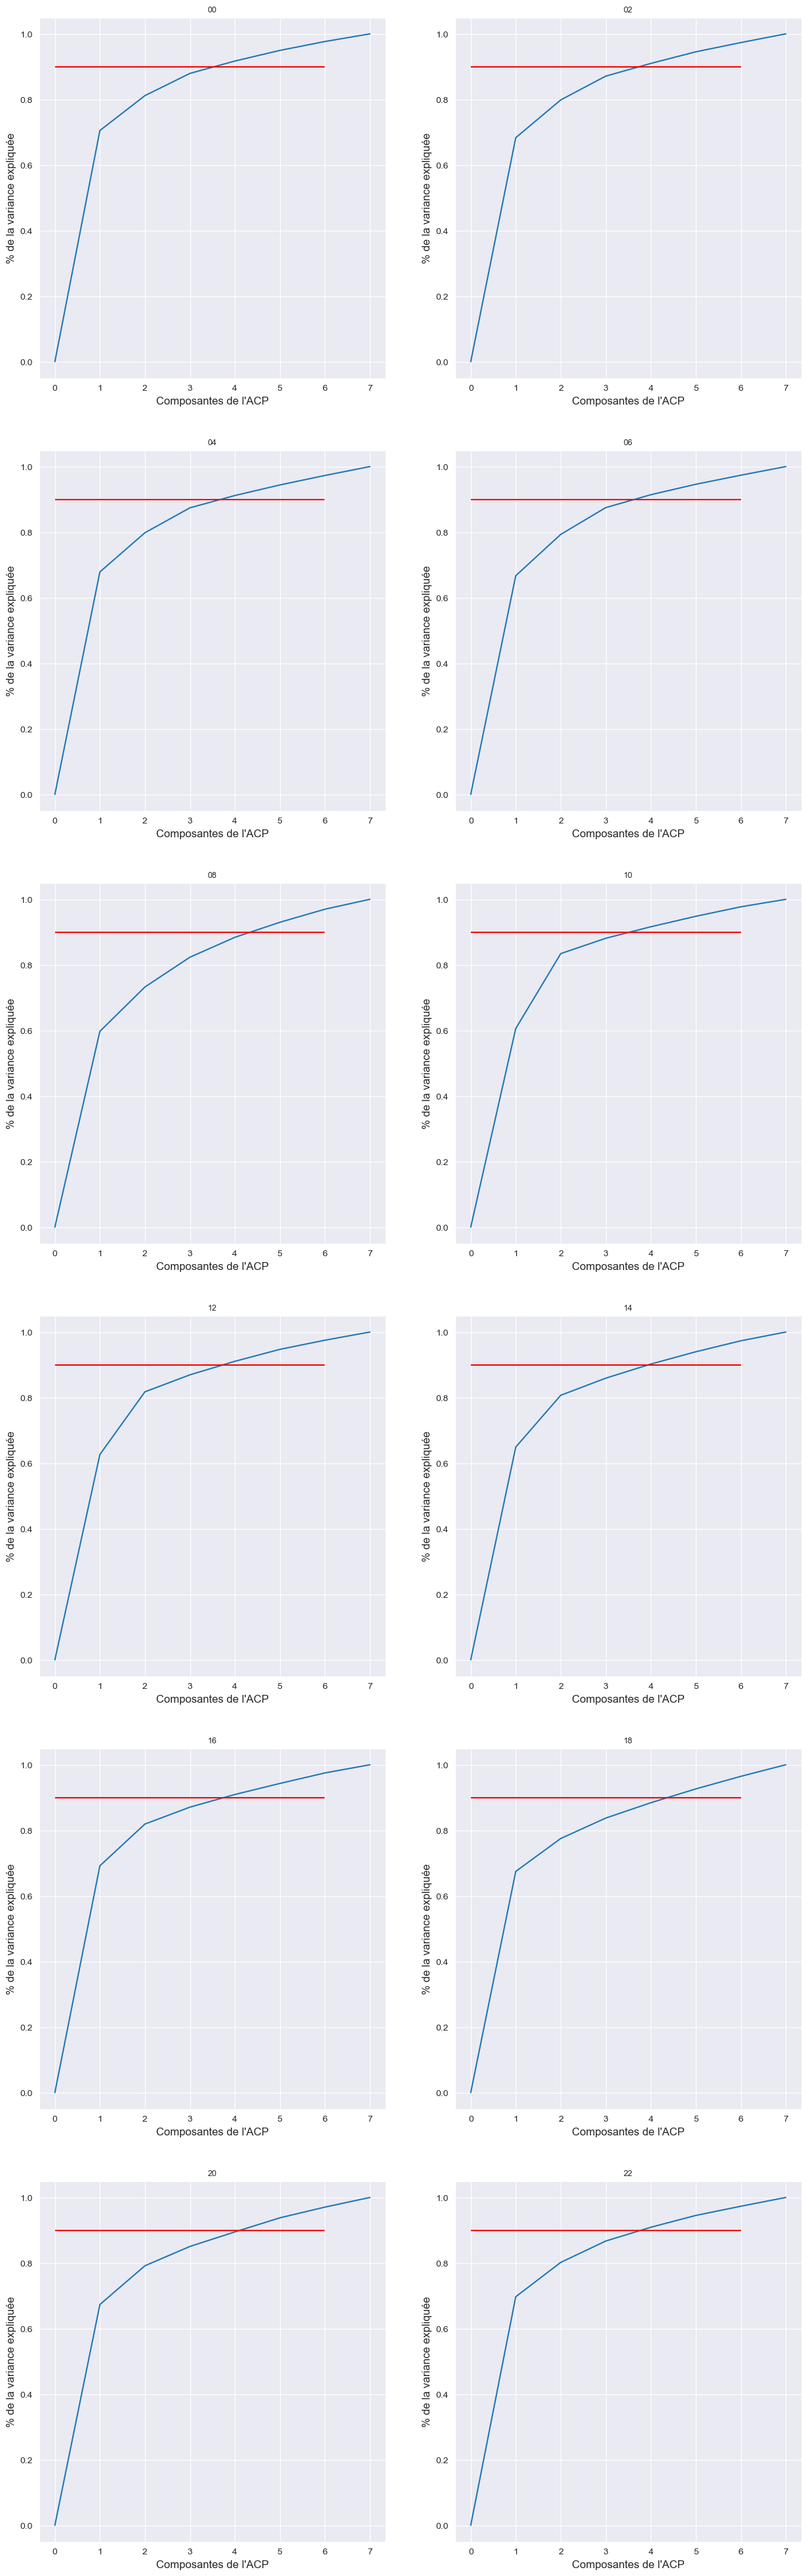